# Part I - FordGoBikes - Who Are the Users? & What are their behaviors?

## by Sofia Schlamp

## Introduction

This dataset consists of almost 200,000 rides made in San Francisco while using the FordGoBikes bike sharing system.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# load the dataset
df = pd.read_csv("fordgobike.csv")

In [3]:
# check the size of the dataset
df.shape

(183412, 16)

In [4]:
# check the features of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# check the overall structure of the dataset for identifying potential features for further analyses
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


### Dataset Structure

This data set consits of 183,412 rides made in a bike sharing system using FordGoBikes.

There are a total of 16 columns, which are the following:

- duration_sec
- start_time
- end_time
- start_station_id
- start_station_name
- start_station_latitude
- start_station_longitude
- end_station_id
- end_station_name
- end_station_latitude
- end_station_longitude
- bike_id
- user_type
- member_birth_year
- member_gender
- bike_share_for_all_trip


### Main features of interest

The main features of interest are: who are the bike users and what are their behaviors. This information could potential help with marketing strategies to know who to target for additional promotion, and whether more bikes need to be made available in certain locations.

The following features will be used:
- age, gender, and type (customer vs. subscriber) of users
- duration of bike ride
- comparison of start vs. end station usage
- where are the bikes picked up

## Univariate Exploration

## What is the age distribution of the bike usage?

For marketing purposes, it would be insightful to understand who are the most and less frequent users. It is expected that at a certain age group (e.g., 65 years which is approximately retirement age), individuals will make less use of the rental bikes.

In [6]:
# From a visual check, I noticed that this information was in floats and had to be transformed to integers
# In order to do that, first I had to identify and remove the n/a values.
# The removal of the n/a values was done for all the columns

df_clean = df.dropna()

In [7]:
# Transform float to integer

df_clean["member_birth_year"] = df_clean["member_birth_year"].astype(int)

/tmp/ipykernel_63/3072119136.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["member_birth_year"] = df_clean["member_birth_year"].astype(int)


In [8]:
# Since it is more difficult to work with years than ages, a new variable was created for age
# To know how to calculate in which year the data is from, I searched for the most recent bike usage:

print(df["end_time"].max())

# Based on the 2019 date, the year was substracted from 2019 to create the age variable.
# Furthermore, I am making the assumption that individuals who are younger than 18 years old cannot rent a bike.

df_clean["age"]=2019-df_clean["member_birth_year"]

2019-03-01 08:01:55.9750


/tmp/ipykernel_63/2547218655.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["age"]=2019-df_clean["member_birth_year"]


In [9]:
# Visualy check that the data has been cleaned correctly
df_clean.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,35
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,47
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,30
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,45
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,60
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983,Female,No,36
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989,Male,No,30
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988,Other,No,31
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992,Male,No,27
10,458,2019-02-28 23:57:57.2110,2019-03-01 00:05:35.4350,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5318,Subscriber,1996,Female,Yes,23


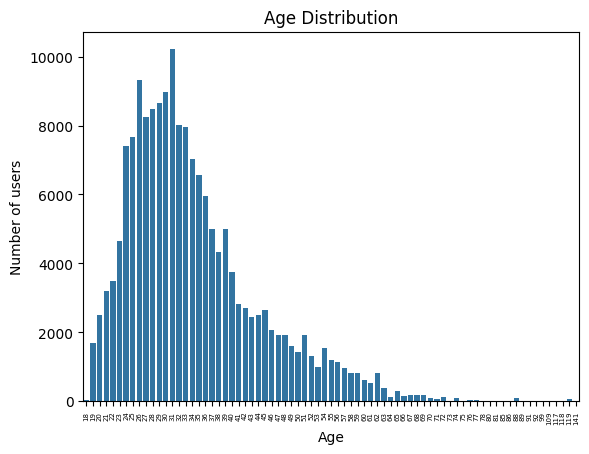

In [10]:
# Create the figure
# Initially the year information in the xticks was too large, so I checked the documentation on how to reduce the font to make it more readable

sns.countplot(data=df_clean, x="age", color="tab:blue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of users")
plt.xticks(rotation=90)
plt.xticks(fontsize=5);


Based on the figure, it can be observed that age data is distributed in a bell-shaped curve skewed right. Most of the users are around 23-37 years old.
Looking at the ouliers, it is highly unlikely that user were older than 100 years old, hence, I considered such datapoint as a typo and I will remove it from the dataset in the next step.
It can be observed that there is a reduction in rides around the 40 years of age.

In [11]:
# Identify the rows where the age is greater than 100
incorrect_data = df_clean[df_clean["age"] > 100]

# Print the index of the incorrect data
incorrect_data.index

Int64Index([  1285,  10827,  16087,  19375,  21424,  21506,  24042,  26133,
             27370,  27675,  29716,  32285,  32725,  32809,  32942,  34747,
             38932,  41194,  41246,  41319,  43880,  45846,  48804,  58222,
             60960,  61611,  62598,  66700,  72711,  72819,  73755,  75686,
             78897,  88152,  92611,  93193,  94326,  94616,  97721,  97997,
            101242, 102148, 107359, 107619, 108314, 109010, 110468, 110734,
            114762, 115637, 119010, 122194, 123240, 128986, 137804, 138297,
            140748, 145510, 147519, 150108, 151936, 161505, 162051, 163112,
            167178, 171086, 171757, 171996, 173711, 177708, 177885, 182830],
           dtype='int64')

In [12]:
# Drop the incorrect data
df_clean2 = df_clean.drop(incorrect_data.index)

In [13]:
# Create a copy of the df to use in the explanatory analyses
df_clean2.to_csv("data_explanatory.csv", index=False, encoding = "utf-8")


## What is the usage of bikes per gender?

In addition to age, it would be interesting to analyze what is the usage of bikes per gender. I do not expect to see gender differences.

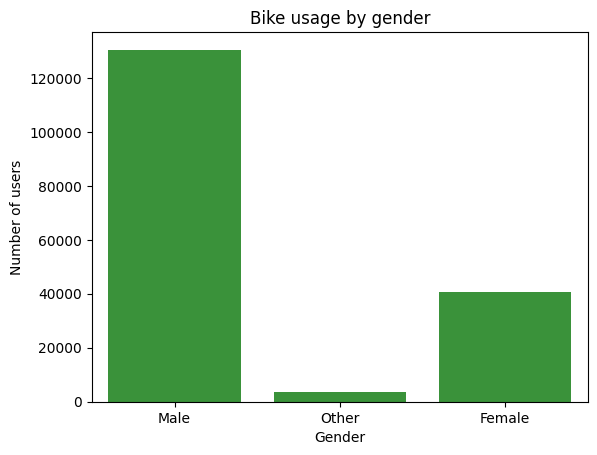

In [32]:
# For the bivariate analyses, it is also helpful to understand the gender composition of the bike users
sns.countplot(data=df_clean2, x='member_gender', color='tab:green')
plt.title("Bike usage by gender")
plt.xlabel("Gender")
plt.ylabel("Number of users")
plt.xticks(fontsize=10);

Based on the figure, it can be concluded that most of the rides were made by men. Appoximately 25% of the rides were made by women. A small percentage of the rides selected "Other" for their gender. This result was unexpected, as I assumed that both men and women would make use of this bike plan at a similar extent. It would be interesting to see if that is still the case when the data is separated per age group.

### Additional analyses based on the user type

For future analyses, it would be interesting to explore who the distribution of users. I assume, most of them would be subscribers.

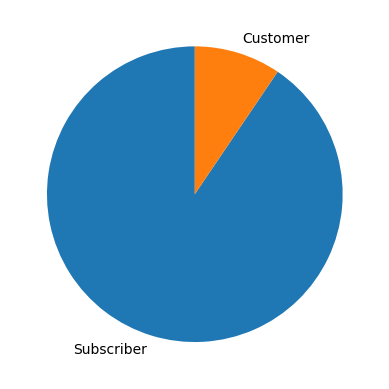

In [33]:
# Create a pie chart plot on the user type
sorted_counts = df_clean2["user_type"].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = True);

From the pie chart, it can be observed that there are only two types of users: subscribers and customers. The vast majority of users are subscribers.

## What is the duration of the bike rides?

To understand the behavior of the individuals, I want to explore the duration of the bike rentals. 

In [34]:
#Since it is easier to work with the data in minutes than seconds, a new "duration_min" variable was created
df_clean2["duration_min"]=df_clean2["duration_sec"]/60

In [35]:
# The head function is used to visually check that the new column has been correctly created
df_clean2.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,duration_min
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,35,869.750000
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,47,1030.900000
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,30,608.166667
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,45,26.416667
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,60,29.883333


In [36]:
# Use the describe function to understand the maximum value for the range of the next figure

df_clean2["duration_min"].describe()

count    174880.000000
mean         11.733706
std          27.375248
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

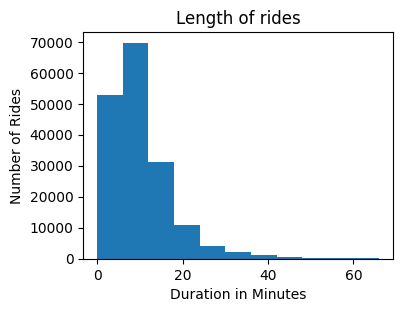

In [37]:
# Create a new figure
fig = plt.figure(figsize=(4,3))

# Add the dimensions of the axes.
ax = fig.add_axes([.125,.125,.775,.755])

# While the max duration is 1409 minutes, that is an outlier, and using a range of 1400 is not practical to visualize the figure, 
# hence the range was adapted to 70
bins = np.arange(0, 70, 6)
ax.hist(data=df_clean2, x="duration_min", bins=bins)
ax.set_title("Length of rides")
ax.set_xlabel("Duration in Minutes")
ax.set_ylabel("Number of Rides");

Based on the figure, it can be observed that most of rides were approximately 10 minutes long. The histogram data was skewed to the right, few rides were longer than 30 minutes long.

## What are the most popular stations where bikes are rented?

To better understand riders behaviors, I also want to explore where most of the bikes are being rented from.
As I am not familiar on how San Francisco named their station, I assume that the most centric, and hence, popular, have smaller id numbers than the less popular areas

In [19]:
# Use the describe function to understand the distribution (max and minimum numbers) of id stations
df["start_station_id"].describe()

count    183215.000000
mean        138.590427
std         111.778864
min           3.000000
25%          47.000000
50%         104.000000
75%         239.000000
max         398.000000
Name: start_station_id, dtype: float64

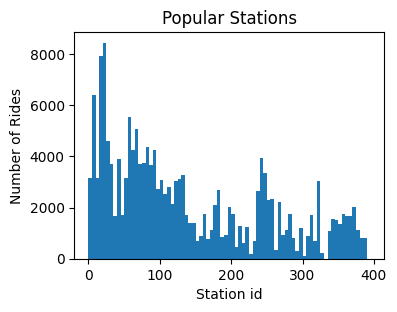

In [20]:
# Create a new figure
fig = plt.figure(figsize=(4,3))

# Add the dimensions of the axes.
ax = fig.add_axes([.125,.125,.775,.755])

bins = np.arange(0, 400, 5)
ax.hist(data=df_clean2, x="start_station_id", bins=bins)
ax.set_title("Popular Stations")
ax.set_xlabel("Station id")
ax.set_ylabel("Number of Rides");



Based on this figure, it can be observed that the most popular stations are among the first 100 based on their id.

## Bivariate Exploration


## What is the link between the age of the individual and duration of the bike ride?

The assumption is that younger (compared to older individuals) will make longer bike rides.

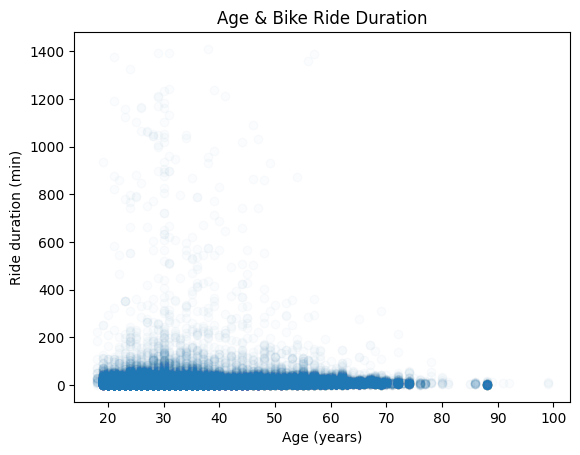

In [21]:
# Create a scatter plot
# Tranparency for the point had to be included, due the high amount of rides. For this figure, another option could have been to select a random number of rides. 

plt.scatter(data=df_clean2, x="age", y="duration_min", alpha=1/50)
plt.title("Age & Bike Ride Duration")
plt.xlabel("Age (years)")
plt.ylabel("Ride duration (min)");

Based on the data no strong links can be observed between the age of the individual and how long their bike rides are. There is a small tendency for younger (versus older) individuals to have longer rides (e.g., a few outliers of more than 600 minutes).
It seems that for individuals who are older than 70 years old, there is a stong decline on the number of rides, including short rides. Furthermore, it can be observed that most of the bikes were rented for a short amount of time, approximately 12 minutes, as also seen in the descriptive results.

## How is the usage of bikes distributed by gender and age?

While men use the bike system more than women, it could be possible that this pattern is not the same for all age group levels. For instance, it could be that in the student category (e.g., younger people), man and women show similar biking patterns.

In [41]:
# Prepare data to create a clustered bar chart
# Define bins and labels for age 
bins = [0, 25, 35, 45, 55, 65, 75, 85, 100]
labels = ["Under 25", "25-35", "35-45", "45-55","55-65","65-75","75-85","85-100" ]

# Create a new variable 'Age_Category'
df_clean2["age_category"] = pd.cut(df_clean2["age"], bins=bins, labels=labels, right=False)


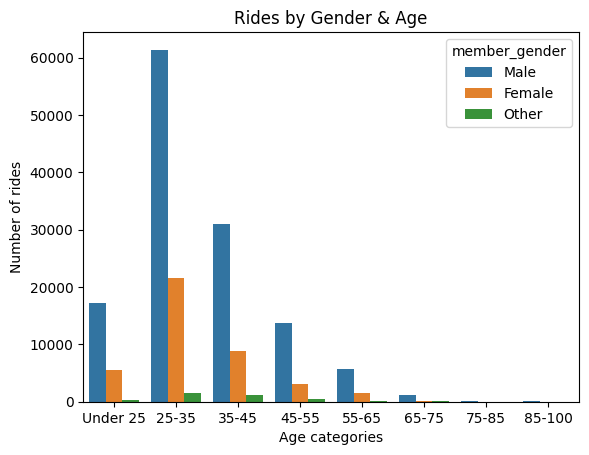

In [42]:
# Create a clustered bar chart
gender_order = ["Male", "Female", "Other"]

sns.countplot(data=df_clean2, x="age_category", hue="member_gender", hue_order=gender_order)
plt.title("Rides by Gender & Age")
plt.xlabel("Age categories")
plt.ylabel("Number of rides");

Based on the data, it can be observed that in all age categories, men made the most bike rides. It would be interesting to see if that is still the pattern when other variables are introduced, for instance, time of the day when the bikes are rented.

## What is the link between the user type and age?

The goal of this question is to explore if one age group (e.g., younger individuals) are more likely to seek a membership with the bike sharing system.

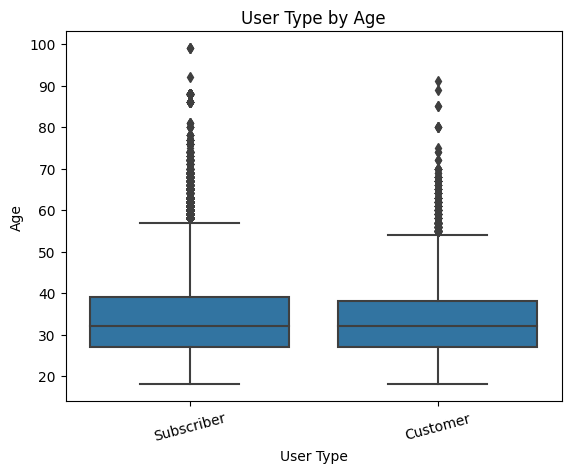

In [24]:
# Prepare the data to create a box plot
# Convert the "User Type" column from a plain object type into an ordered categorical type 
# Types of users
users = ['Subscriber', 'Customer']

# The two types of users are transformed into membership types
membership_types = pd.CategoricalDtype(ordered=True, categories=users)

# user_type is converted from a plain object to an ordered categorical type 
df_clean2['user_type'] = df_clean2['user_type'].astype(membership_types);

# Create box plot
ax1 = sns.boxplot(data=df_clean2, x='user_type', y='age', color='tab:blue')
plt.title("User Type by Age")
plt.xlabel("User Type")
plt.ylabel("Age")
plt.xticks(rotation=15)
plt.ylim(ax1.get_ylim());

Based on the figure, it can be observed that the age range between subscriber and customers is similar, which could mean that age is not a factor on whether an indiviudal is a subscriber or a customer.

## Multivariate Exploration

### What is the ride behavior by gender? How long are they rides and from where do they usually start?

It is possible that there is a link between length of rides and gender, for instance that while women rent less bikes than men do, they take longer rides. Furthermore, it would also be interesting to explore if there are any differences from where the bike rides start, e.g., in more centric stations or in the outside of the city.

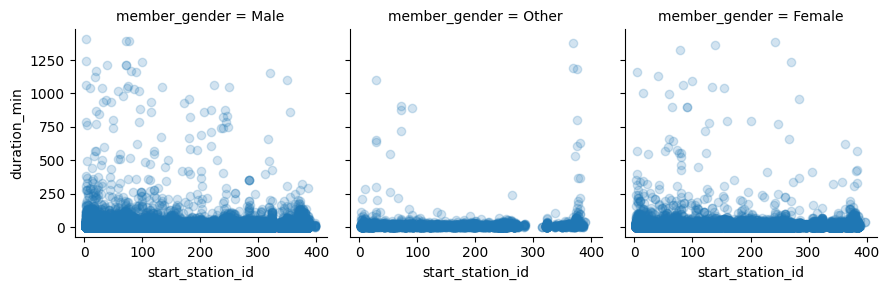

In [25]:
# Create Facet Plot

g = sns.FacetGrid(data=df_clean2, col='member_gender')
g.map(plt.scatter, 'start_station_id','duration_min', alpha=1/5);

Unlike expected, men and women completed rides of approximately the same duration. However, it was curious to see that individuals who selected "other" in gender, proportionally started more rides in stations far away from the city center (approximately around the id 380). Such data could hint at a social stratification, where individuals who identify themselves with a different gender live in the outskirts of the city.

### What is the link between bike duration, and renting and returning bikes in the same or different locations?

For stocking bikes in the stations, it is helpful for the company to understand if people have the tendency to return their bikes in the same station where they rented them, or in a different one. Furthermore, including the bike duration will also provide some additional insights on the length of the rides.

In [40]:
# Not to overplot the following figure, I tried to select a random sample, 
# however I continued getting the error that indeces were not found in the axis with the data set I created,
# that is why for this exercise I used the initial with the variable "duration_sec" instead of "duration_min" which I created

# Choose random sample
np.random.seed(50)
sample = np.random.choice(df.shape[0], 200, replace = False)
df_subset = df.loc[sample]

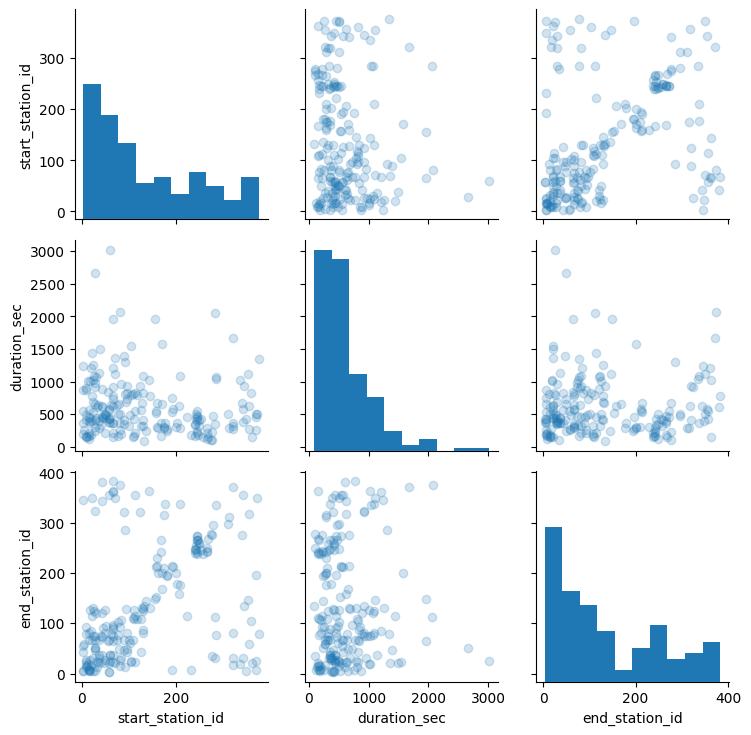

In [42]:
# Plot matrix

g = sns.PairGrid(data=df_subset, vars=['start_station_id', 'duration_sec', 'end_station_id'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, alpha=1/5);

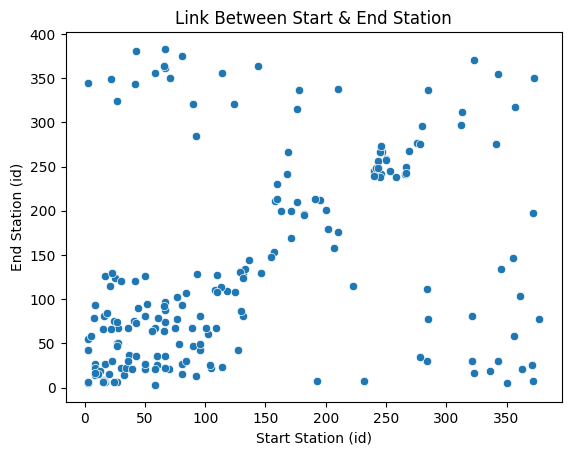

In [15]:
# Since I found the figure above complex, and the duration variable does not bring additional insights, 
# I decided to conduct one more analysis only using the start and end station id

# Choose random sample
np.random.seed(50)
sample = np.random.choice(df.shape[0], 200, replace = False)
df_subset = df.loc[sample]

# Create scatter plot
sns.scatterplot(data=df_subset, x="start_station_id", y="end_station_id")
plt.title("Link Between Start & End Station")
plt.xlabel("Start Station (id)")
plt.ylabel("End Station (id)");

Based on the figures, a couple of conclusions can be drawn:
- There is a strong tendency for riders to return the bike in the same station from which they rented it
- Due the strong link between the start and end station, no differences are observed between the length of the bike ride and the start or end station locations
- Most of the bikes are rented in the stations ranging from id 1-100
- Most bike rides are between 1-10 minutes long

## Conclusions

To better understand the bike users and their behaviors, a dataset consisting of almost 200,000 rides in San Francisco was analyzed.

When analyzing at who the bike users are, it was observed that:
- A large proportion of them were men, followed by women, and individuals who selected "other" in their gender. 
- The largest usage of bikes are by individuals around 23-37 years old.
- Most riders have a subscription.

When analyzing the behaviors of the bike users, it can be concluded that:
- The vast majority rentals and returns of the bike happened at the same station.
- They engage in rides which are on average 11 minutes long.
- In the stations near the city center (stations id 1-100), it can also be observed that bikes were returned to locations proximate from where they were rented.
- No strong link was identified between the duration of the bike ride and the station from where the bike was rented.

Reflecting on the overall exploration process:
- The data needed some work to be cleaned.
- New variables were created to be able to better analze the dataset.
- More continuous variables would have been benefitial for the multivariate analyzes, for example, how much do individuals pay for the bike usage.
- To address overplotting, jitter was used as well as a subset of the data.